In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
'''
whole = pd.read_csv('drive/Shared drives/IST 597/Data-FE/whole_df_reddit_final.csv')
whole = whole.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','num_comments','selftext','created_utc','score','title','clean_text'])
whole
'''

"\nwhole = pd.read_csv('drive/Shared drives/IST 597/Data-FE/whole_df_reddit_final.csv')\nwhole = whole.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','num_comments','selftext','created_utc','score','title','clean_text'])\nwhole\n"

In [0]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
import json
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import MinMaxScaler

from textwrap import wrap


In [0]:

model_performance_dict = dict()
whole = pd.read_csv('drive/Shared drives/IST 597/Data-FE/submission_2015_2017.tsv',sep='\t')
whole1 = whole

"""
X_train = whole[whole['type']=='train']
X_val = whole[whole['type']=='val']
X_train = X_train.append(X_val)
X_test = whole[whole['type']=='test']

y_train = X_train['z score']
X_train = X_train.drop(['type','z score'], axis=1)
y_test = X_test['z score']
X_test = X_test.drop(['type','z score'], axis=1)
"""

whole = whole.drop(columns=['author','num_comments','selftext','created_utc','score','title','z_score_cat'])

X = whole.drop(['z score'], axis=1)
y = whole['z score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [26]:
y.describe()

count    11200.000000
mean         1.846927
std          3.421746
min         -0.216693
25%         -0.000110
50%          0.993954
75%          1.988018
max         55.828508
Name: z score, dtype: float64

In [0]:


def model_diagnostics(model, pr=True):
    """
    Returns and prints the R-squared, RMSE and the MAE for a trained model
    """
    y_predicted = model.predict(X_test)
    r2 = r2_score(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    if pr:
        print(f"R-Sq: {r2:.4}")
        print(f"RMSE: {np.sqrt(mse)}")
        print(f"MAE: {mae}")
    
    return [r2,np.sqrt(mse),mae]
def plot_residuals(y_test, y_predicted):
    """"
    Plots the distribution for actual and predicted values of the target variable. Also plots the distribution for the residuals
    """
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
    sns.distplot(y_test, ax=ax0, kde = False)
    ax0.set(xlabel='Test scores')
    sns.distplot(y_predicted, ax=ax1, kde = False)
    ax1.set(xlabel="Predicted scores")
    plt.show()
    fig, ax2 = plt.subplots()
    sns.distplot((y_test-y_predicted), ax = ax2,kde = False)
    ax2.set(xlabel="Residuals")
    plt.show()
def y_test_vs_y_predicted(y_test,y_predicted):
    """
    Produces a scatter plot for the actual and predicted values of the target variable
    """
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_predicted)
    ax.set_xlabel("Test Scores")
    ax.set_ylim([-75, 1400])
    ax.set_ylabel("Predicted Scores")
    plt.show()

def get_feature_importance(model):
    """
    For fitted tree based models, get_feature_importance can be used to get the feature importance as a tidy output
    """
    X_non_text = pd.get_dummies(df[cat_cols])
    features = numeric_cols + bool_cols + list(X_non_text.columns)
    feature_importance = dict(zip(features, model.feature_importances_))
    for name, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
        print(f"{name:<30}: {importance:>6.2%}")
        print(f"\nTotal importance: {sum(feature_importance.values()):.2%}")
    return feature_importance

def model_comparison(model_performance_dict, sort_by = 'RMSE', metric = 'RMSE'):

    Rsq_list = []
    RMSE_list = []
    MAE_list = []
    for key in model_performance_dict.keys():
        Rsq_list.append(model_performance_dict[key][0])
        RMSE_list.append(model_performance_dict[key][1])
        MAE_list.append(model_performance_dict[key][2])

    props = pd.DataFrame([])

    props["R-squared"] = Rsq_list
    props["RMSE"] = RMSE_list
    props["MAE"] = MAE_list

    index = []

    for key in model_performance_dict.keys():
      index.append(key)

    props.index = ['\n'.join(wrap(l,12)) for l in index]
    props = props.sort_values(by = sort_by)

    fig, ax = plt.subplots(figsize = (10,6))

    ax.yaxis.grid(zorder=0)
    ax.bar(props.index, props[metric], color="royalblue", width=0.4, zorder=3)
    plt.title("Reddit")
    plt.xticks(fontsize=14)
    plt.ylabel(metric)



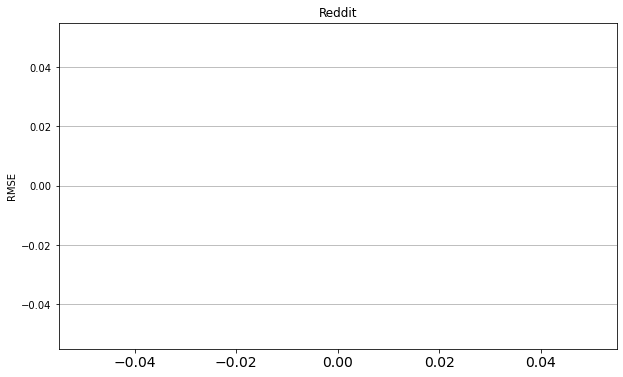

In [28]:
model_comparison(model_performance_dict)

In [29]:
X1 = whole1['selftext']
y1 = whole1['z score']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

X_train1.values
#y_train1

array(["Last Friday - Monday was the lowest I've ever been with my depression. The following Tuesday - Friday weren't actually bad days though, the depression wasn't as bad and neither was my anxiety. I could laugh and smile and make jokes with my friends. But something felt so off. I didn't feel 'bad' enough. The depression didn't feel real enough. Does anyone else feel like this?",
       "I don't know what to do, my family thinks I'm a typical happy kid with a decent amount of friends in school. In reality I feel completely empty and have no friends at all. All emotion that I show to my family is completely fake, it's just a mask hiding my true self and it's starting to hurt. Throughout my entire life I've always been a pretty happy guy, I guess I was even a class clown of sorts throughout middle school, I always loved to make people laugh. But ever since I moved the summer going into 9th grade I've lost all of that and it's just feels like it's getting worse and worse. I'm in 10th 

# **LSTM Regression**

In [0]:
from keras.layers import BatchNormalization
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# MAX_NB_WORDS = 500
# EMBEDDING_DIM = 100
# MAX_SEQUENCE_LENGTH = 11200
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# print(whole1['selftext'].values)
# print(whole1['selftext'].shape)
# print(whole1['z score'].shape)
# tokenizer.fit_on_texts(str(whole1['selftext'].values))
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# X_temp = tokenizer.texts_to_sequences(str(whole1['selftext'].values))
# X_temp = pad_sequences(X_temp, maxlen=MAX_SEQUENCE_LENGTH)
# print('Shape of data tensor:', X_temp.shape)
 

# print(X_temp.shape)
# X_temp = X_temp.transpose()
# X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_temp, whole1['z score'], test_size=0.2, random_state=1)

# print(X_train_lstm.shape, y_train_lstm.shape)
# print(X_test_lstm.shape,y_test_lstm.shape)
# X_test_lstm[1].shape

# #y_train1

In [0]:


# def baseline_model():
# 	# create model
# 	model = Sequential()
# 	model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train_lstm.shape[1]))
# 	model.add(LSTM(1))
# 	model.add(BatchNormalization())
# #	model.add(Dense(60, kernel_initializer='normal', activation='relu'))
# #	model.add(BatchNormalization())
# 	model.add(Dense(1, kernel_initializer='normal'))
# 	# Compile model
# 	model.compile(loss='mean_squared_error', optimizer='adam')
# 	return model
# estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=10, verbose=0)
# #batch_size = [5, 10, 20, 40, 60, 80, 100]
# #epochs = [100, 150]
# #param_grid = dict(batch_size=batch_size, epochs=epochs)
# #grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1, cv=3)

# estimator.fit(X_train_lstm, y_train_lstm)
# pred=estimator.predict(X_test_lstm)
# rmse = np.sqrt(mean_squared_error(y_test_lstm, pred))
# print("RMSE: %f" % (rmse))

# #grid_result = grid.fit(X_train, y_train)
# # summarize results
# #print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # means = grid_result.cv_results_['mean_test_score']
# # stds = grid_result.cv_results_['std_test_score']
# # params = grid_result.cv_results_['params']
# # for mean, stdev, param in zip(means, stds, params):
# #     print("%f (%f) with: %r" % (mean, stdev, param))


# **Linear Regression**

In [0]:
# linear = LinearRegression()
# linear.fit(X_train,y_train)
# model_performance_dict["Linear Regression"] = model_diagnostics(linear)

# **Logistic regression**

In [0]:
# clf = LogisticRegression(random_state=0)
# clf.fit(X_train, y_train)

# # pred = clf.predict(X_test)
# # rmse = np.sqrt(mean_squared_error(y_test, pred))
# # print("RMSE: %f" % (rmse))
# model_performance_dict["Logistic Regression"] = model_diagnostics(clf)

#**Ensemble** 

In [33]:
xgb_model1 = XGBRegressor(max_depth= 9, min_child_weight=3, learning_rate = 0.05, \
                     gamma = 0.2, n_estimators=200, subsample=0.6, \
                     colsample_bytree=0.8, eta=0.1, seed=1)

xgb_model2 = XGBRegressor(max_depth= 4, min_child_weight=3, learning_rate = 0.05, \
                     gamma = 0.2, n_estimators=200, subsample=0.6, \
                     colsample_bytree=0.8, eta=0.1, seed=1)

xgb_model3 = XGBRegressor(max_depth= 6, min_child_weight=5, learning_rate = 0.05, \
                     gamma = 0.2, n_estimators=200, subsample=0.6, \
                     colsample_bytree=0.8, eta=0.1, seed=1)

xg_train, x_val, yxg_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

xgb_model1.fit(xg_train, yxg_train, early_stopping_rounds=10, eval_metric='rmse',\
               verbose=True, eval_set=[(x_val, y_val)])

xgb_model2.fit(xg_train, yxg_train, early_stopping_rounds=10, eval_metric='rmse', \
          verbose=True, eval_set=[(x_val, y_val)] )

xgb_model3.fit(xg_train, yxg_train, early_stopping_rounds=10, eval_metric='rmse', \
          verbose=True, eval_set=[(x_val, y_val)])

pred1=xgb_model1.predict(X_test)
pred2=xgb_model2.predict(X_test)
pred3=xgb_model3.predict(X_test)

finalpred=(pred1+pred2+pred3)/3
r2 = r2_score(y_test, finalpred)
rmse = np.sqrt(mean_squared_error(y_test, finalpred))
mae = mean_absolute_error(y_test, finalpred)
model_performance_dict["Ensemble Regression"] = [r2,rmse,mae]

#print("RMSE: %f" % (rmse))      
#print(f"R-Sq: {r2:.4}")
print(f"RMSE: {rmse}")
#print(f"MAE: {mae}")

[07:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.83195
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:3.79817
[2]	validation_0-rmse:3.76856
[3]	validation_0-rmse:3.74238
[4]	validation_0-rmse:3.71571
[5]	validation_0-rmse:3.69157
[6]	validation_0-rmse:3.67102
[7]	validation_0-rmse:3.6498
[8]	validation_0-rmse:3.63116
[9]	validation_0-rmse:3.61872
[10]	validation_0-rmse:3.60546
[11]	validation_0-rmse:3.58904
[12]	validation_0-rmse:3.57998
[13]	validation_0-rmse:3.57062
[14]	validation_0-rmse:3.56143
[15]	validation_0-rmse:3.55295
[16]	validation_0-rmse:3.54583
[17]	validation_0-rmse:3.53694
[18]	validation_0-rmse:3.53229
[19]	validation_0-rmse:3.52358
[20]	validation_0-rmse:3.52057
[21]	validation_0-rmse:3.51772
[22]	validation_0-rmse:3.51607
[23]	validation_0-rmse:3.51563
[24]	validation_0-rmse:3.51114
[25]	validation_0-rmse:3.51022
[26]	validati

# Random Forest

In [34]:

rf = RandomForestRegressor(n_jobs=-1, n_estimators=70, min_samples_leaf=10, random_state = 10)
rf.fit(X_train, y_train)

# pred = rf.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, pred))
# print("RMSE: %f" % (rmse))
model_performance_dict["Random Forest"] = model_diagnostics(rf)

R-Sq: 0.09676
RMSE: 3.0903872987057373
MAE: 1.8451918219737617


# AdaBoost

In [35]:
ada_reg = AdaBoostRegressor( n_estimators=100,learning_rate=0.005, loss='exponential')
print(ada_reg)
#AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
#         n_estimators=100, random_state=None)
ada_reg.fit(X_train, y_train)
# pred = ada_reg.predict(X_test);
# rmse = np.sqrt(mean_squared_error(y_test, pred))
# print("RMSE: %f" % (rmse))

model_performance_dict["AdaBoost"] = model_diagnostics(ada_reg)


AdaBoostRegressor(base_estimator=None, learning_rate=0.005, loss='exponential',
                  n_estimators=100, random_state=None)
R-Sq: 0.07333
RMSE: 3.130226167944858
MAE: 1.8779559534804873


#KNN Regressor

In [36]:
# instantiate learning model (k = 3)
knn = KNeighborsRegressor(n_neighbors=20)

# fitting the model
knn.fit(X_train, y_train)

# # predict the response
# pred = knn.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, pred))
# print("RMSE: %f" % (rmse))
model_performance_dict["KNN Regressor"] = model_diagnostics(knn)


R-Sq: 0.005524
RMSE: 3.2427187349402957
MAE: 1.9703019439550438


#**Neural network**

In [37]:

from keras.layers import BatchNormalization
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=80, kernel_initializer='normal', activation='relu'))
	model.add(BatchNormalization())
	model.add(Dense(60, kernel_initializer='normal', activation='relu'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
#	model.add(BatchNormalization())
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=20, verbose=0)
#batch_size = [5, 10, 20, 40, 60, 80, 100]
#epochs = [100, 150]
#param_grid = dict(batch_size=batch_size, epochs=epochs)
#grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1, cv=3)
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
#param_grid = dict(init_mode=init_mode)
#grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1, cv=3)
#grid_result = grid.fit(X_train, y_train)
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

estimator.fit(X_train, y_train)
model_performance_dict["Neural Network Regressor"] = model_diagnostics(estimator)
#pred=estimator.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, pred))
#print("RMSE: %f" % (rmse))

#grid_result = grid.fit(X_train, y_train)
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


R-Sq: 0.08962
RMSE: 3.1025802587406623
MAE: 1.7426443387755073


# XGBoost Regressor

In [38]:
xgb = XGBRegressor(max_depth= 6, min_child_weight=5, learning_rate = 1.05, \
                     gamma = 0.2, n_estimators=200, subsample=0.6, \
                     colsample_bytree=0.8, eta=0.1, seed=1)


xgb.fit(xg_train, yxg_train, early_stopping_rounds=20, eval_metric='rmse',\
               verbose=True, eval_set=[(x_val, y_val)])

# pred=xgb.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, pred))
# print("RMSE: %f" % (rmse))
model_performance_dict["XGBoost Regressor"] = model_diagnostics(xgb)

[07:39:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.73689
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:3.92326
[2]	validation_0-rmse:3.96183
[3]	validation_0-rmse:4.03447
[4]	validation_0-rmse:3.98919
[5]	validation_0-rmse:4.06196
[6]	validation_0-rmse:4.11315
[7]	validation_0-rmse:4.19507
[8]	validation_0-rmse:4.24356
[9]	validation_0-rmse:4.272
[10]	validation_0-rmse:4.28131
[11]	validation_0-rmse:4.3806
[12]	validation_0-rmse:4.40353
[13]	validation_0-rmse:4.4455
[14]	validation_0-rmse:4.48914
[15]	validation_0-rmse:4.50411
[16]	validation_0-rmse:4.55841
[17]	validation_0-rmse:4.58359
[18]	validation_0-rmse:4.56827
[19]	validation_0-rmse:4.62771
[20]	validation_0-rmse:4.65825
Stopping. Best iteration:
[0]	validation_0-rmse:3.73689

R-Sq: -0.05913
RMSE: 3.3464622799145265
MAE: 1.9528790910976264


# **Gradient Boosting Regressor**

In [39]:
gbr = GradientBoostingRegressor(n_estimators=70, max_depth=5)
gbr.fit(X_train, y_train)
model_performance_dict["Gradient Boosting Regression"] = model_diagnostics(gbr)

R-Sq: 0.05485
RMSE: 3.1612704756907077
MAE: 1.86093901272324


# **Ploting**

In [40]:
model_performance_dict

{'AdaBoost': [0.07332593193772519, 3.130226167944858, 1.8779559534804873],
 'Ensemble Regression': [0.09925412709776571,
  3.0861238667018682,
  1.775427083239292],
 'Gradient Boosting Regression': [0.05485403385379173,
  3.1612704756907077,
  1.86093901272324],
 'KNN Regressor': [0.0055243908099544825,
  3.2427187349402957,
  1.9703019439550438],
 'Neural Network Regressor': [0.08962227246253895,
  3.1025802587406623,
  1.7426443387755073],
 'Random Forest': [0.09676367526654106,
  3.0903872987057373,
  1.8451918219737617],
 'XGBoost Regressor': [-0.05912554484098553,
  3.3464622799145265,
  1.9528790910976264]}

In [41]:
features = list(X_train)
avg_impt = (xgb_model1.feature_importances_ + xgb_model2.feature_importances_+xgb_model3.feature_importances_)/3
avg_impt = gbr.feature_importances_
feature_importance = dict(zip(features, avg_impt))

feat_impt = {}

for name, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    feat_impt[name] = str((importance*100).round(2))+'%'
    print(f"{name:<30}: {importance:>6.2%}")
    print(f"\nTotal importance: {sum(feature_importance.values()):.2%}")

feat_impt_df = pd.DataFrame()
feat_impt_df['feature'] = list(feat_impt.keys())
feat_impt_df['importance'] = list(feat_impt.values())
feat_impt_df

content_topic7                :  8.51%

Total importance: 100.00%
title_word_count              :  6.43%

Total importance: 100.00%
content_word_count            :  4.97%

Total importance: 100.00%
readability_content           :  3.94%

Total importance: 100.00%
content_topic16               :  3.30%

Total importance: 100.00%
content_topic18               :  2.87%

Total importance: 100.00%
content_topic21               :  2.73%

Total importance: 100.00%
title_topic0                  :  2.65%

Total importance: 100.00%
content_topic23               :  2.64%

Total importance: 100.00%
readability_title             :  2.59%

Total importance: 100.00%
title_topic26                 :  2.22%

Total importance: 100.00%
title_topic32                 :  2.02%

Total importance: 100.00%
title_topic28                 :  1.92%

Total importance: 100.00%
content_topic5                :  1.88%

Total importance: 100.00%
content_topic19               :  1.73%

Total importance: 100.00%
title_topi

,feature,importance
0,content_topic7,8.51%
1,title_word_count,6.43%
2,content_word_count,4.97%
3,readability_content,3.94%
4,content_topic16,3.3%
...,...,...
75,content_topic15,0.13%
76,title_topic13,0.11%
77,title_topic10,0.1%
78,title_topic15,0.03%


In [0]:
feat_impt_df.to_csv('drive/Shared drives/IST 597/Data-FE/reddit_features.csv',index=False)

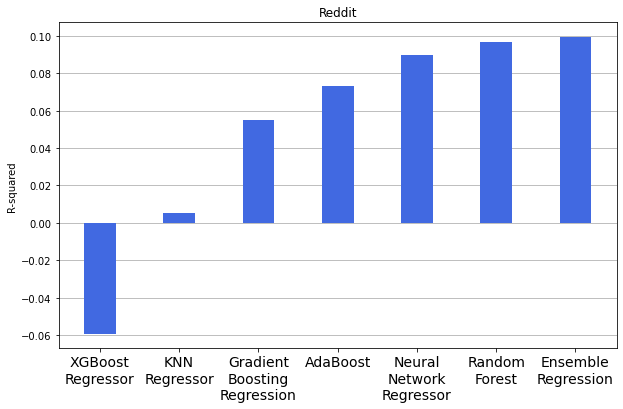

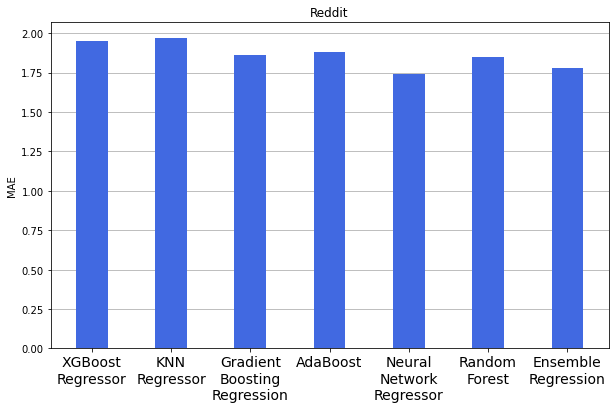

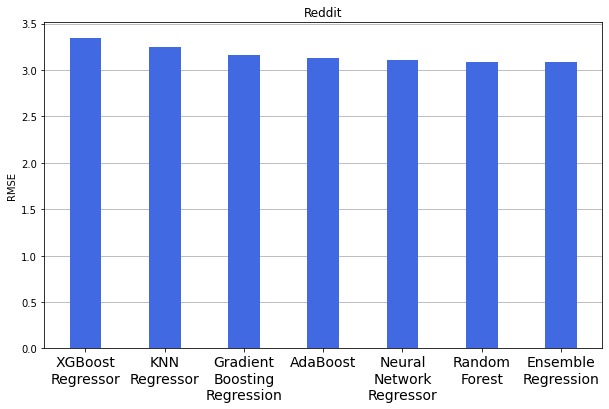

In [43]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'R-squared')
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'MAE')
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'RMSE')